In [1]:
import pandas as pd
dataset = pd.read_csv('./SupplyChain.csv',encoding='unicode_escape')
dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [5]:
# 缺失值查看,有缺失值的字段'Customer Lname', 'Customer Zipcode', 'Order Zipcode','Product Description'
temp = dataset.isnull().sum()
temp[temp>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [6]:
temp[temp>0].index

Index(['Customer Lname', 'Customer Zipcode', 'Order Zipcode',
       'Product Description'],
      dtype='object')

In [10]:
# 缺失值补全
dataset['Customer Zipcode'].value_counts()
# 按众数填充
dataset['Customer Zipcode'].fillna(725.0,inplace=True)
dataset['Customer Zipcode'].value_counts()

725.0      66773
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

In [12]:
# 缺失值补全
dataset['Customer Lname'].value_counts()
# 按众数填充
dataset['Customer Lname'].fillna("Smith",inplace=True)
dataset['Customer Lname'].value_counts()

Smith           64112
Johnson           989
Brown             909
Williams          869
Jones             859
                ...  
Gerginokish         1
Gulvishvokov        1
Cash                1
Lan                 1
Domingue            1
Name: Customer Lname, Length: 1109, dtype: int64

In [16]:
# 剩下两个特征drop掉
dataset.drop(['Order Zipcode','Product Description'],axis=1,inplace=True)

KeyError: "['Order Zipcode' 'Product Description'] not found in axis"

In [17]:
temp = dataset.isnull().sum()
temp[temp>0]

Series([], dtype: int64)

<AxesSubplot:>

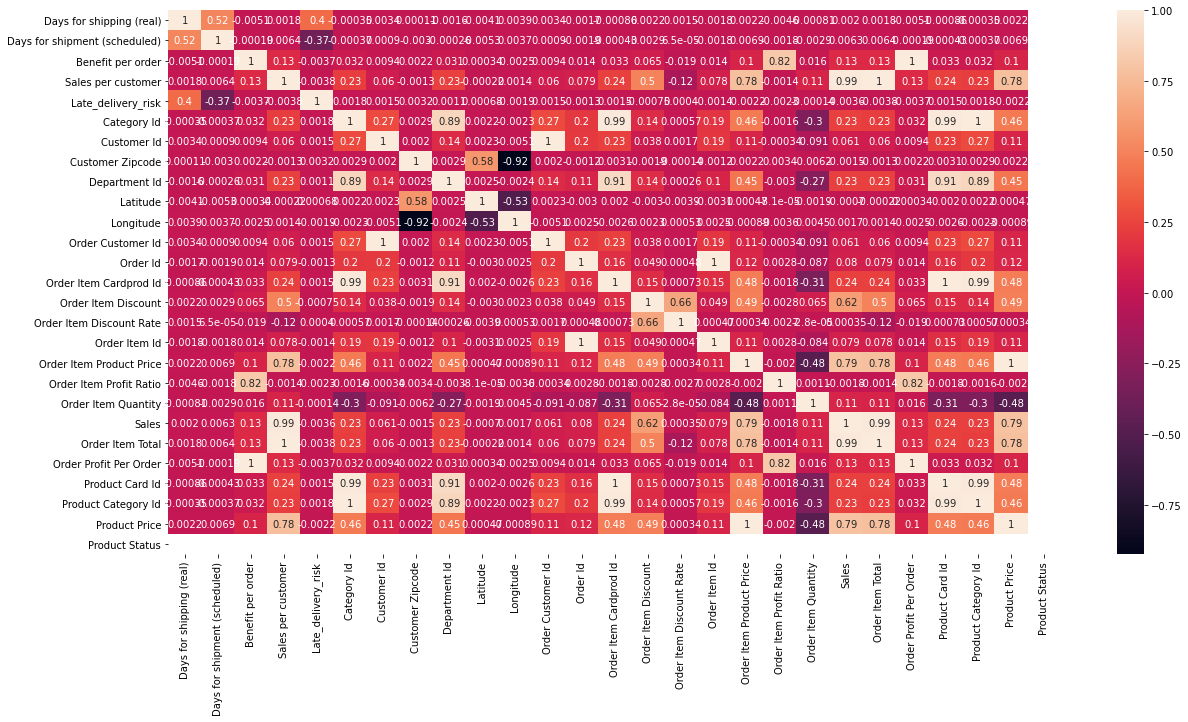

In [19]:
# 热力图呈现，查看特征之间的相关性
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,16))
data = dataset
sns.heatmap(data.corr(),annot=True) # annotation 标注，将数值标注到图上
'''
Sales与Sales per customer高度相关0.99
'Product Category Id'与'Category Id'完全一致，去掉一个
'''

In [21]:
data[['Product Category Id','Category Id']]
dataset.drop(['Product Category Id'],axis=1,inplace=True)

# 特征探索

* 于销售额进行探索（对应 Sales per customer）
* 照不同的Market, Order Region
* 同的Category Name
* 照不同的时间维度（年，月，星期，小时）的趋势
* product Price与Sales per customer 相关性如何


<AxesSubplot:title={'center':'Total Sales in different Market'}, xlabel='Market'>

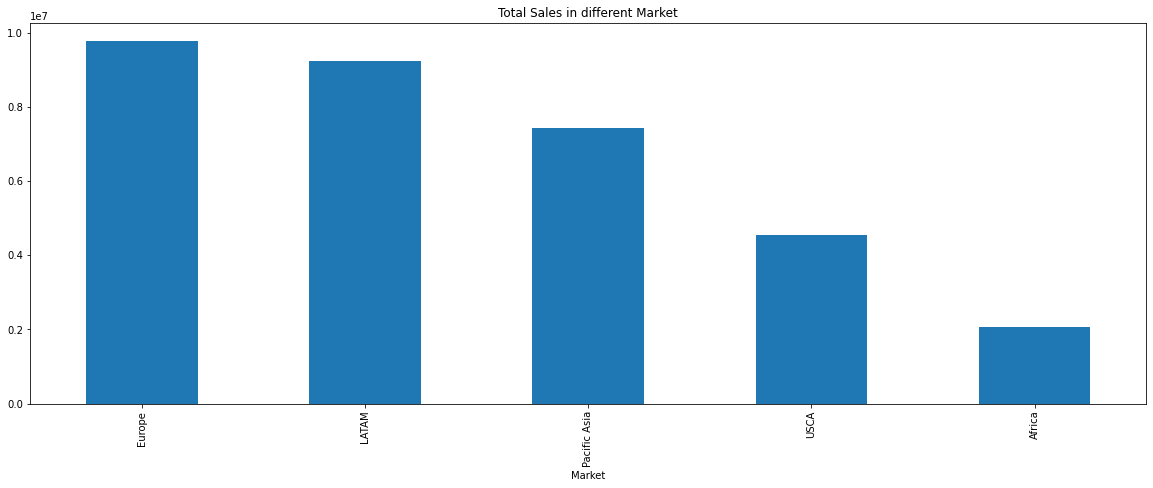

In [26]:
# 基于market字段进行聚合
data['Market'].value_counts()
Market = data.groupby('Market')
# 看不同Market的总销售额
Market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(20,8),title="Total Sales in different Market")

<AxesSubplot:title={'center':'Total Sales in different Market'}, xlabel='Market'>

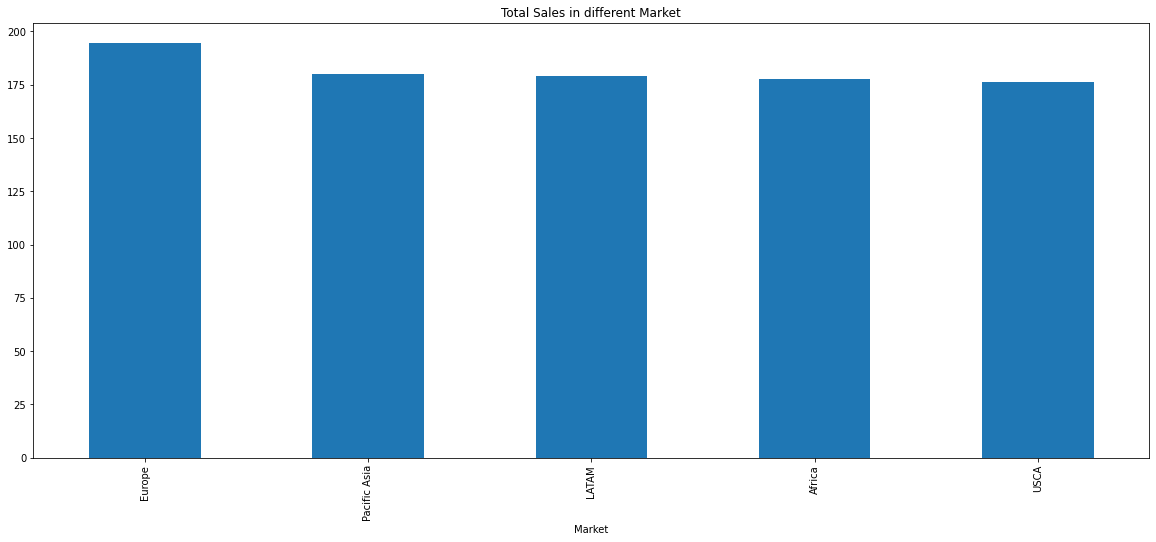

In [27]:
# 看不同Market的平均售额
Market['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(20,8),title="Average Sales in different Market")

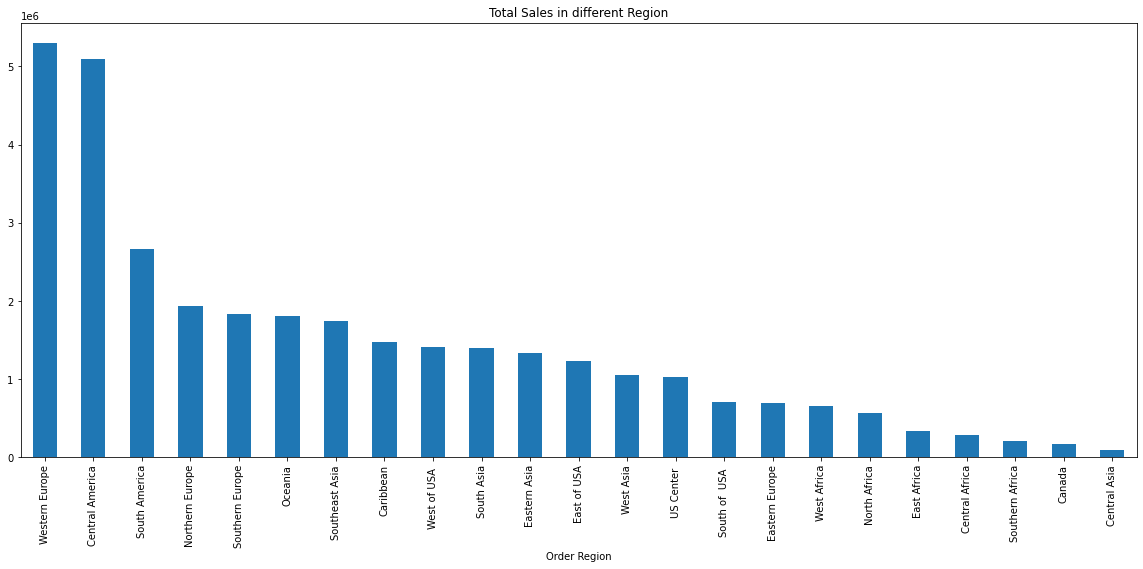

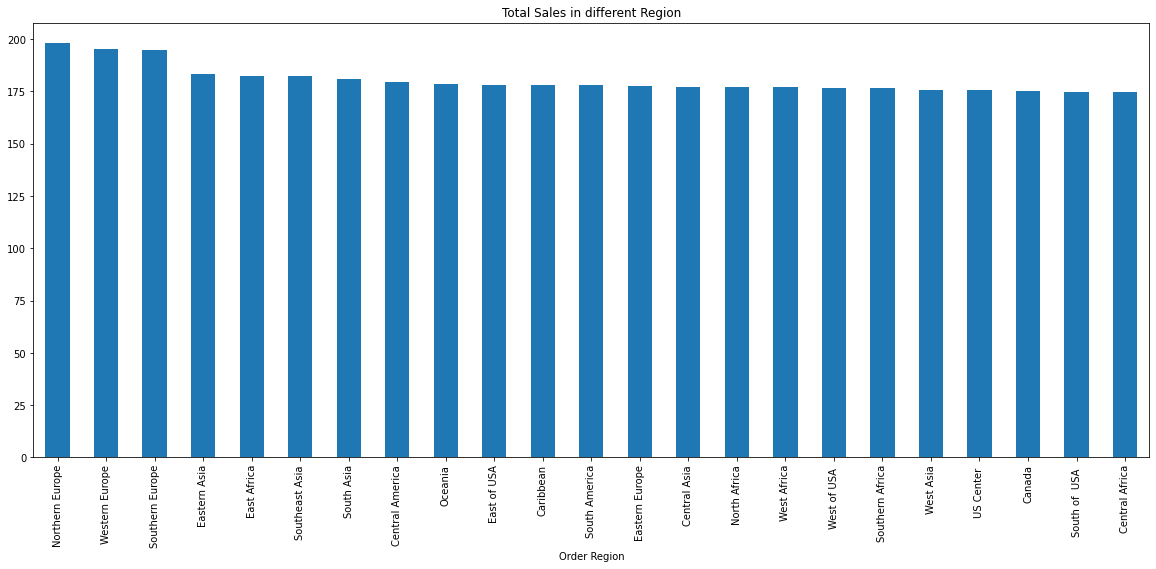

In [28]:
# 基于Order Region字段进行聚合
data['Order Region'].value_counts()
Region = data.groupby('Order Region')
# 看不同Region的总销售额
Region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(20,8),title="Total Sales in different Region")
plt.show()
# 看不同Region的平均销售额
Region['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(20,8),title="Total Sales in different Region")
plt.show()

In [31]:
data.info()
data.select_dtypes(include='O').columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [32]:
data[['order date (DateOrders)','shipping date (DateOrders)']]

,order date (DateOrders),shipping date (DateOrders)
0,1/31/2018 22:56,2/3/2018 22:56
1,1/13/2018 12:27,1/18/2018 12:27
2,1/13/2018 12:06,1/17/2018 12:06
3,1/13/2018 11:45,1/16/2018 11:45
4,1/13/2018 11:24,1/15/2018 11:24
...,...,...
180514,1/16/2016 3:40,1/20/2016 3:40
180515,1/16/2016 1:34,1/19/2016 1:34
180516,1/15/2016 21:00,1/20/2016 21:00
180517,1/15/2016 20:18,1/18/2016 20:18


In [33]:
# 时间多尺度
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data[['order date (DateOrders)']]

,order date (DateOrders)
0,2018-01-31 22:56:00
1,2018-01-13 12:27:00
2,2018-01-13 12:06:00
3,2018-01-13 11:45:00
4,2018-01-13 11:24:00
...,...
180514,2016-01-16 03:40:00
180515,2016-01-16 01:34:00
180516,2016-01-15 21:00:00
180517,2016-01-15 20:18:00


In [37]:
# 年
data['order_year'] = data['order date (DateOrders)'].dt.year
# 月
data['order_month'] = data['order date (DateOrders)'].dt.month
# 星期
data['order_weekday'] = data['order date (DateOrders)'].dt.weekday
# 小时
data['order_hour'] = data['order date (DateOrders)'].dt.hour
data[['order_year','order_month','order_weekday','order_hour']]

,order_year,order_month,order_weekday,order_hour
0,2018,1,2,22
1,2018,1,5,12
2,2018,1,5,12
3,2018,1,5,11
4,2018,1,5,11
...,...,...,...,...
180514,2016,1,5,3
180515,2016,1,5,1
180516,2016,1,4,21
180517,2016,1,4,20


In [40]:
df_year = data.groupby('order_year')
df_month = data.groupby('order_month')
df_weekday = data.groupby('order_weekday')
df_hour = data.groupby('order_hour')

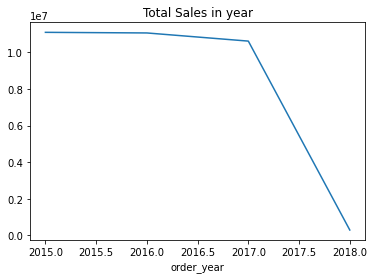

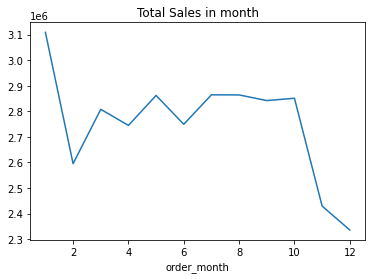

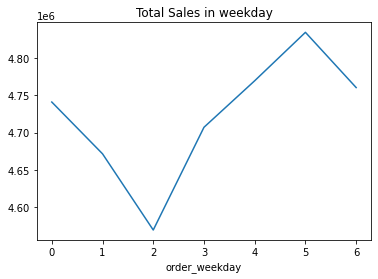

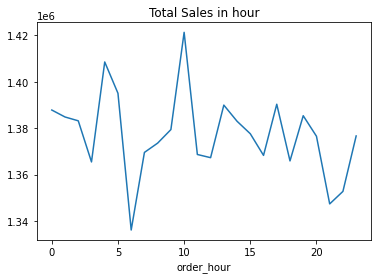

In [42]:
df_year['Sales per customer'].sum().plot(title="Total Sales in year")
plt.show()

df_month['Sales per customer'].sum().plot(title="Total Sales in month")
plt.show()

df_weekday['Sales per customer'].sum().plot(title="Total Sales in weekday")
plt.show()

df_hour['Sales per customer'].sum().plot(title="Total Sales in hour")
plt.show()

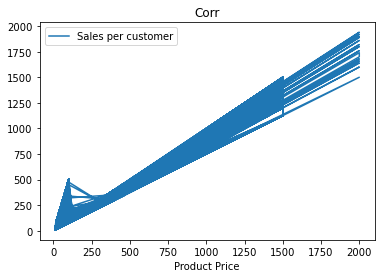

In [44]:
# 散点图展示product Price与Sales per customer的相关性
data.plot(x='Product Price',y='Sales per customer')
plt.title('Corr')
plt.show()

# RFM用户分层

In [45]:
#  计算R指标
data['order date (DateOrders)'].max()
# 找到时间最大值，假设现在所处时间比最大值大一天

Timestamp('2018-01-31 23:38:00')

In [46]:
import datetime
current = datetime.datetime(2018,2,1)
# 按照Customer Id进行聚合
customer_seg = data.groupby('Customer Id').agg({
    'order date (DateOrders)':lambda x: (current-x.max()).days,
    'Order Id':lambda x: len(x),
    'Sales per customer': lambda x: sum(x)
})
customer_seg

,order date (DateOrders),Order Id,Sales per customer
Customer Id,,,
1,792,1,472.450012
2,136,10,1618.660042
3,229,18,3189.200037
4,380,14,1480.709993
5,457,7,1101.919998
...,...,...,...
20753,0,1,161.869995
20754,0,1,172.660004
20755,0,1,314.640015


In [47]:
# RFM指标统计
customer_seg.rename(columns={
    'order date (DateOrders)':'R_value',
    'Order Id':'F_value',
    'Sales per customer':'M_value'
},inplace=True)
customer_seg

,R_value,F_value,M_value
Customer Id,,,
1,792,1,472.450012
2,136,10,1618.660042
3,229,18,3189.200037
4,380,14,1480.709993
5,457,7,1101.919998
...,...,...,...
20753,0,1,161.869995
20754,0,1,172.660004
20755,0,1,314.640015


In [54]:
# 分箱处理
R_median = customer_seg.median()[0]
F_median = customer_seg.median()[1]
M_median = customer_seg.median()[2]

def compute_R(x):
    '''
        R_value 越小分越高
    '''
    if x<R_median:
        return 1
    return 0
    

def compute_F(x):
    '''
        F_value 越大分越高
    '''
    if x<F_median:
        return 0
    return 1
    
def compute_M(x):
    '''
        M_value 越大分越高
    '''
    if x<M_median:
        return 0
    return 1
    
# 新建R_score字段，用于将R_value 映射成0和1，0代表低，1代表高
customer_seg['R_score'] = customer_seg['R_value'].apply(compute_R)
customer_seg['F_score'] = customer_seg['F_value'].apply(compute_F)
customer_seg['M_score'] = customer_seg['M_value'].apply(compute_M)
customer_seg

,R_value,F_value,M_value,R_score,F_score,M_score
Customer Id,,,,,,
1,792,1,472.450012,0,0,0
2,136,10,1618.660042,1,1,1
3,229,18,3189.200037,0,1,1
4,380,14,1480.709993,0,1,1
5,457,7,1101.919998,0,1,0
...,...,...,...,...,...,...
20753,0,1,161.869995,1,0,0
20754,0,1,172.660004,1,0,0
20755,0,1,314.640015,1,0,0


In [58]:
# 计算RFM用户分层
def RFM_user(df):
  if df['M_score'] == 1 and df['R_score'] == 1 and df['F_score'] == 1:
    return '重要价值用户'
  elif df['M_score'] == 1 and df['R_score'] == 1 and df['F_score'] == 0:
    return '重要发展用户'
  elif df['M_score'] == 1 and df['R_score'] == 0 and df['F_score'] == 1:
    return '重要保持用户'
  elif df['M_score'] == 1 and df['R_score'] == 0 and df['F_score'] == 0:
    return '重要挽留用户'
  elif df['M_score'] == 0 and df['R_score'] == 1 and df['F_score'] == 1:
    return '一般价值用户'
  elif df['M_score'] == 0 and df['R_score'] == 1 and df['F_score'] == 0:
    return '一般发展用户'
  elif df['M_score'] == 0 and df['R_score'] == 0 and df['F_score'] == 1:
    return '一般保持用户'
  elif df['M_score'] == 0 and df['R_score'] == 0 and df['F_score'] == 0:
    return '一般挽留用户'

customer_seg['tag'] = customer_seg.apply(RFM_user,axis=1)
customer_seg

,R_value,F_value,M_value,R_score,F_score,M_score,tag
Customer Id,,,,,,,
1,792,1,472.450012,0,0,0,一般挽留用户
2,136,10,1618.660042,1,1,1,重要价值用户
3,229,18,3189.200037,0,1,1,重要保持用户
4,380,14,1480.709993,0,1,1,重要保持用户
5,457,7,1101.919998,0,1,0,一般保持用户
...,...,...,...,...,...,...,...
20753,0,1,161.869995,1,0,0,一般发展用户
20754,0,1,172.660004,1,0,0,一般发展用户
20755,0,1,314.640015,1,0,0,一般发展用户


In [59]:
customer_seg['tag'].value_counts()

一般发展用户    8141
重要保持用户    8105
重要价值用户    1814
一般挽留用户    1533
一般保持用户     597
重要发展用户     304
重要挽留用户     103
一般价值用户      55
Name: tag, dtype: int64

# 欺诈订单统计

In [60]:
# 共计9种类型的订单状态，SUSPECTED_FRAUD是疑似欺诈订单
data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [61]:
temp = data[data['Order Status']=='SUSPECTED_FRAUD']
# TRANSFER 转账
temp['Type'].value_counts()

TRANSFER    4062
Name: Type, dtype: int64

In [62]:
temp['Market'].value_counts()

LATAM           1182
Europe          1172
Pacific Asia     869
USCA             602
Africa           237
Name: Market, dtype: int64

In [64]:
temp2 = data[data['Type']=='TRANSFER']
temp2['Order Status'].value_counts()

PROCESSING         21902
PENDING            20227
SUSPECTED_FRAUD     4062
CANCELED            3692
Name: Order Status, dtype: int64

In [65]:
data.to_pickle('data.pkl')